# **Linear Regression Overview**

Linear regression is a statistical and machine learning technique used to model the relationship between a dependent variable (target) and one or more independent variables (features). It is widely used for predictive modeling, where the goal is to predict the dependent variable based on the values of the independent variables.

## **Approximation**

## \\[ \hat{y} \approx wx + c \\]

**Where:**

- \\(\hat{y}\\): Predicted value of the dependent variable.
- \\(m\\): Slope of the line (rate of change of \\(y\\) with respect to \\(x\\)).
- \\(x\\): Independent variable.
- \\(c\\): Intercept (value of \\(y\\) when \\(x = 0\\)).


## **Evaluation Metric**

### **Mean Squared Error (MSE):**
 
## \\[ MSE = J(w, b) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 \\]

**Where:**
- \\(y_i\\): Actual value of the \(i\)-th observation.
- \\(\hat{y}_i\\): Predicted value of the \(i\)-th observation.
- \\(N\\): Number of observations.


# **Implementation in Python**

In [1]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate = 0.001, num_iters = 1000):
        self.learning_rate = learning_rate
        self.num_iters = num_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        num_samples, num_features = X.shape
        
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for _ in range(self.num_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias = self.learning_rate * db
    
    def predict(self, X):
        approximation = np.dot(X, self.weights) + self.bias
        return approximation

    def mse(self, y_actual, y_predicted):
        return np.mean((y_actual - y_predicted) ** 2)

    def r2_score(self, y_true, y_pred):
        corr_matrix = np.corrcoef(y_true, y_pred)
        corr = corr_matrix[0, 1]
        return corr ** 2

## **Creating Sample Data**

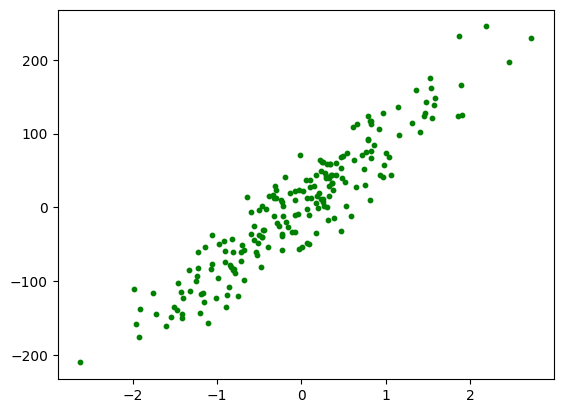

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=200, n_features=1, noise=30, random_state=42)

plt.scatter(X, y, color='green', s=10)
plt.show()

## **Testing**

Mean Squared Error (MSE) :  791.0154639300933
Model's accuracy :  0.9177074582629998


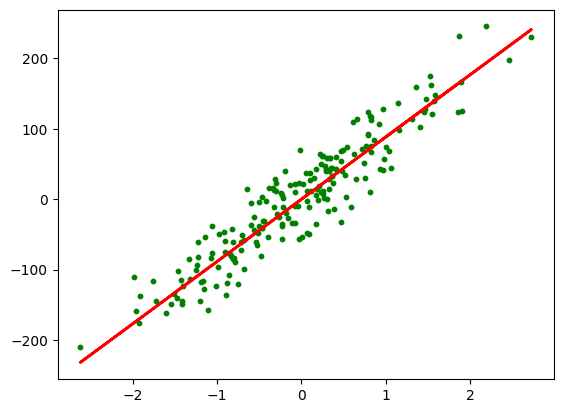

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

model = LinearRegression(learning_rate=0.01, num_iters=1000)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

mean_squared_error = model.mse(y_test, prediction)
print("Mean Squared Error (MSE) : ", mean_squared_error)

accuracy = model.r2_score(y_test, prediction)
print("Model's accuracy : ", accuracy)

plt.scatter(X, y, color='green', s=10)
plt.plot(X, model.predict(X), color = 'red', linewidth = 2, label = "Predictions")

Hence the Simple Linear Regression is implemented in python and succussfully. You can try with different learning rates to see how the approximation reflects the plot...